In [39]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv( 'player_world_stats.csv' ,index_col=0)
data = data.drop_duplicates(subset='name')

print(data.columns)
data = data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]

temp_span_year = []
temp_span_start = []
for span in data.Span:
    texts = span.split("-")
    temp_span_year.append(int(texts[1]) - int(texts[0]) + 1)
    temp_span_start.append(int(texts[0]))

data["Span"] = temp_span_year
data["SpanStart"] = temp_span_start

temp_born = []
for born in data.Born:
    result = re.search('1\d{3}', str(born))
    if result is not None:
        temp_born.append(int(result.group()))
    else:
        temp_born.append(0)

data["BornYear"] = temp_born

temp_weight = []
for weight in data.Weight:
    result = str(weight).replace(' lb','')
    temp_weight.append(0.45359237 * float(result))

data["Weight"] = temp_weight

temp_height = []

for height in data.Height:
    texts = str(height).split(" ")
    height_data = 0
    if len(texts) >= 3:        
        height_data = (float(texts[0]) * 12 + float(texts[2])) * 2.54

    temp_height.append(height_data)

data["Height"] = temp_height

data.head()
data.describe()

Index(['name', 'Full name', 'Born', 'Major teams', 'Position', 'Span', 'Mat',
       'Start', 'Sub', 'Pts', 'Tries', 'Conv', 'Pens', 'Drop', 'GfM', 'Won',
       'Lost', 'Draw', '%', 'Died', 'Height', 'Weight', 'Current age', 'Other',
       'Relations', 'Nickname', 'Also known as', 'Goals', 'Links'],
      dtype='object')


,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
count,15084.000000,15084.000000,15084.000000,15084.000000,14512.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,6120.000000,15084.000000,15084.000000
mean,3.623243,10.618868,8.858592,1.760276,11.961756,1.424490,0.924954,1.021811,0.100570,47.855709,74.612584,97.829943,1967.368271,1589.387894
std,3.277361,15.935014,13.689546,4.279494,49.394087,3.631824,7.315015,8.875523,0.820591,32.683397,90.578878,14.600169,39.122647,751.603232
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1876.000000
50%,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1977.000000,1939.000000
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,70.000000,182.880000,108.862169,2000.000000,1975.000000
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000


In [40]:
data = data.dropna(subset=['Position'])
data.describe()

,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
count,14571.000000,14571.000000,14571.000000,14571.000000,13999.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,6113.000000,14571.000000,14571.000000
mean,3.694256,10.920458,9.110631,1.809828,12.397028,1.474298,0.957244,1.057374,0.104111,48.000375,77.151084,97.827549,1967.561938,1639.860545
std,3.291395,16.124534,13.854756,4.344026,50.237566,3.685278,7.440601,9.028324,0.834692,32.306680,91.037629,14.600699,39.498718,707.140274
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1882.000000
50%,2.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1978.000000,1942.000000
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,69.700000,182.880000,108.862169,2001.000000,1976.000000
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000


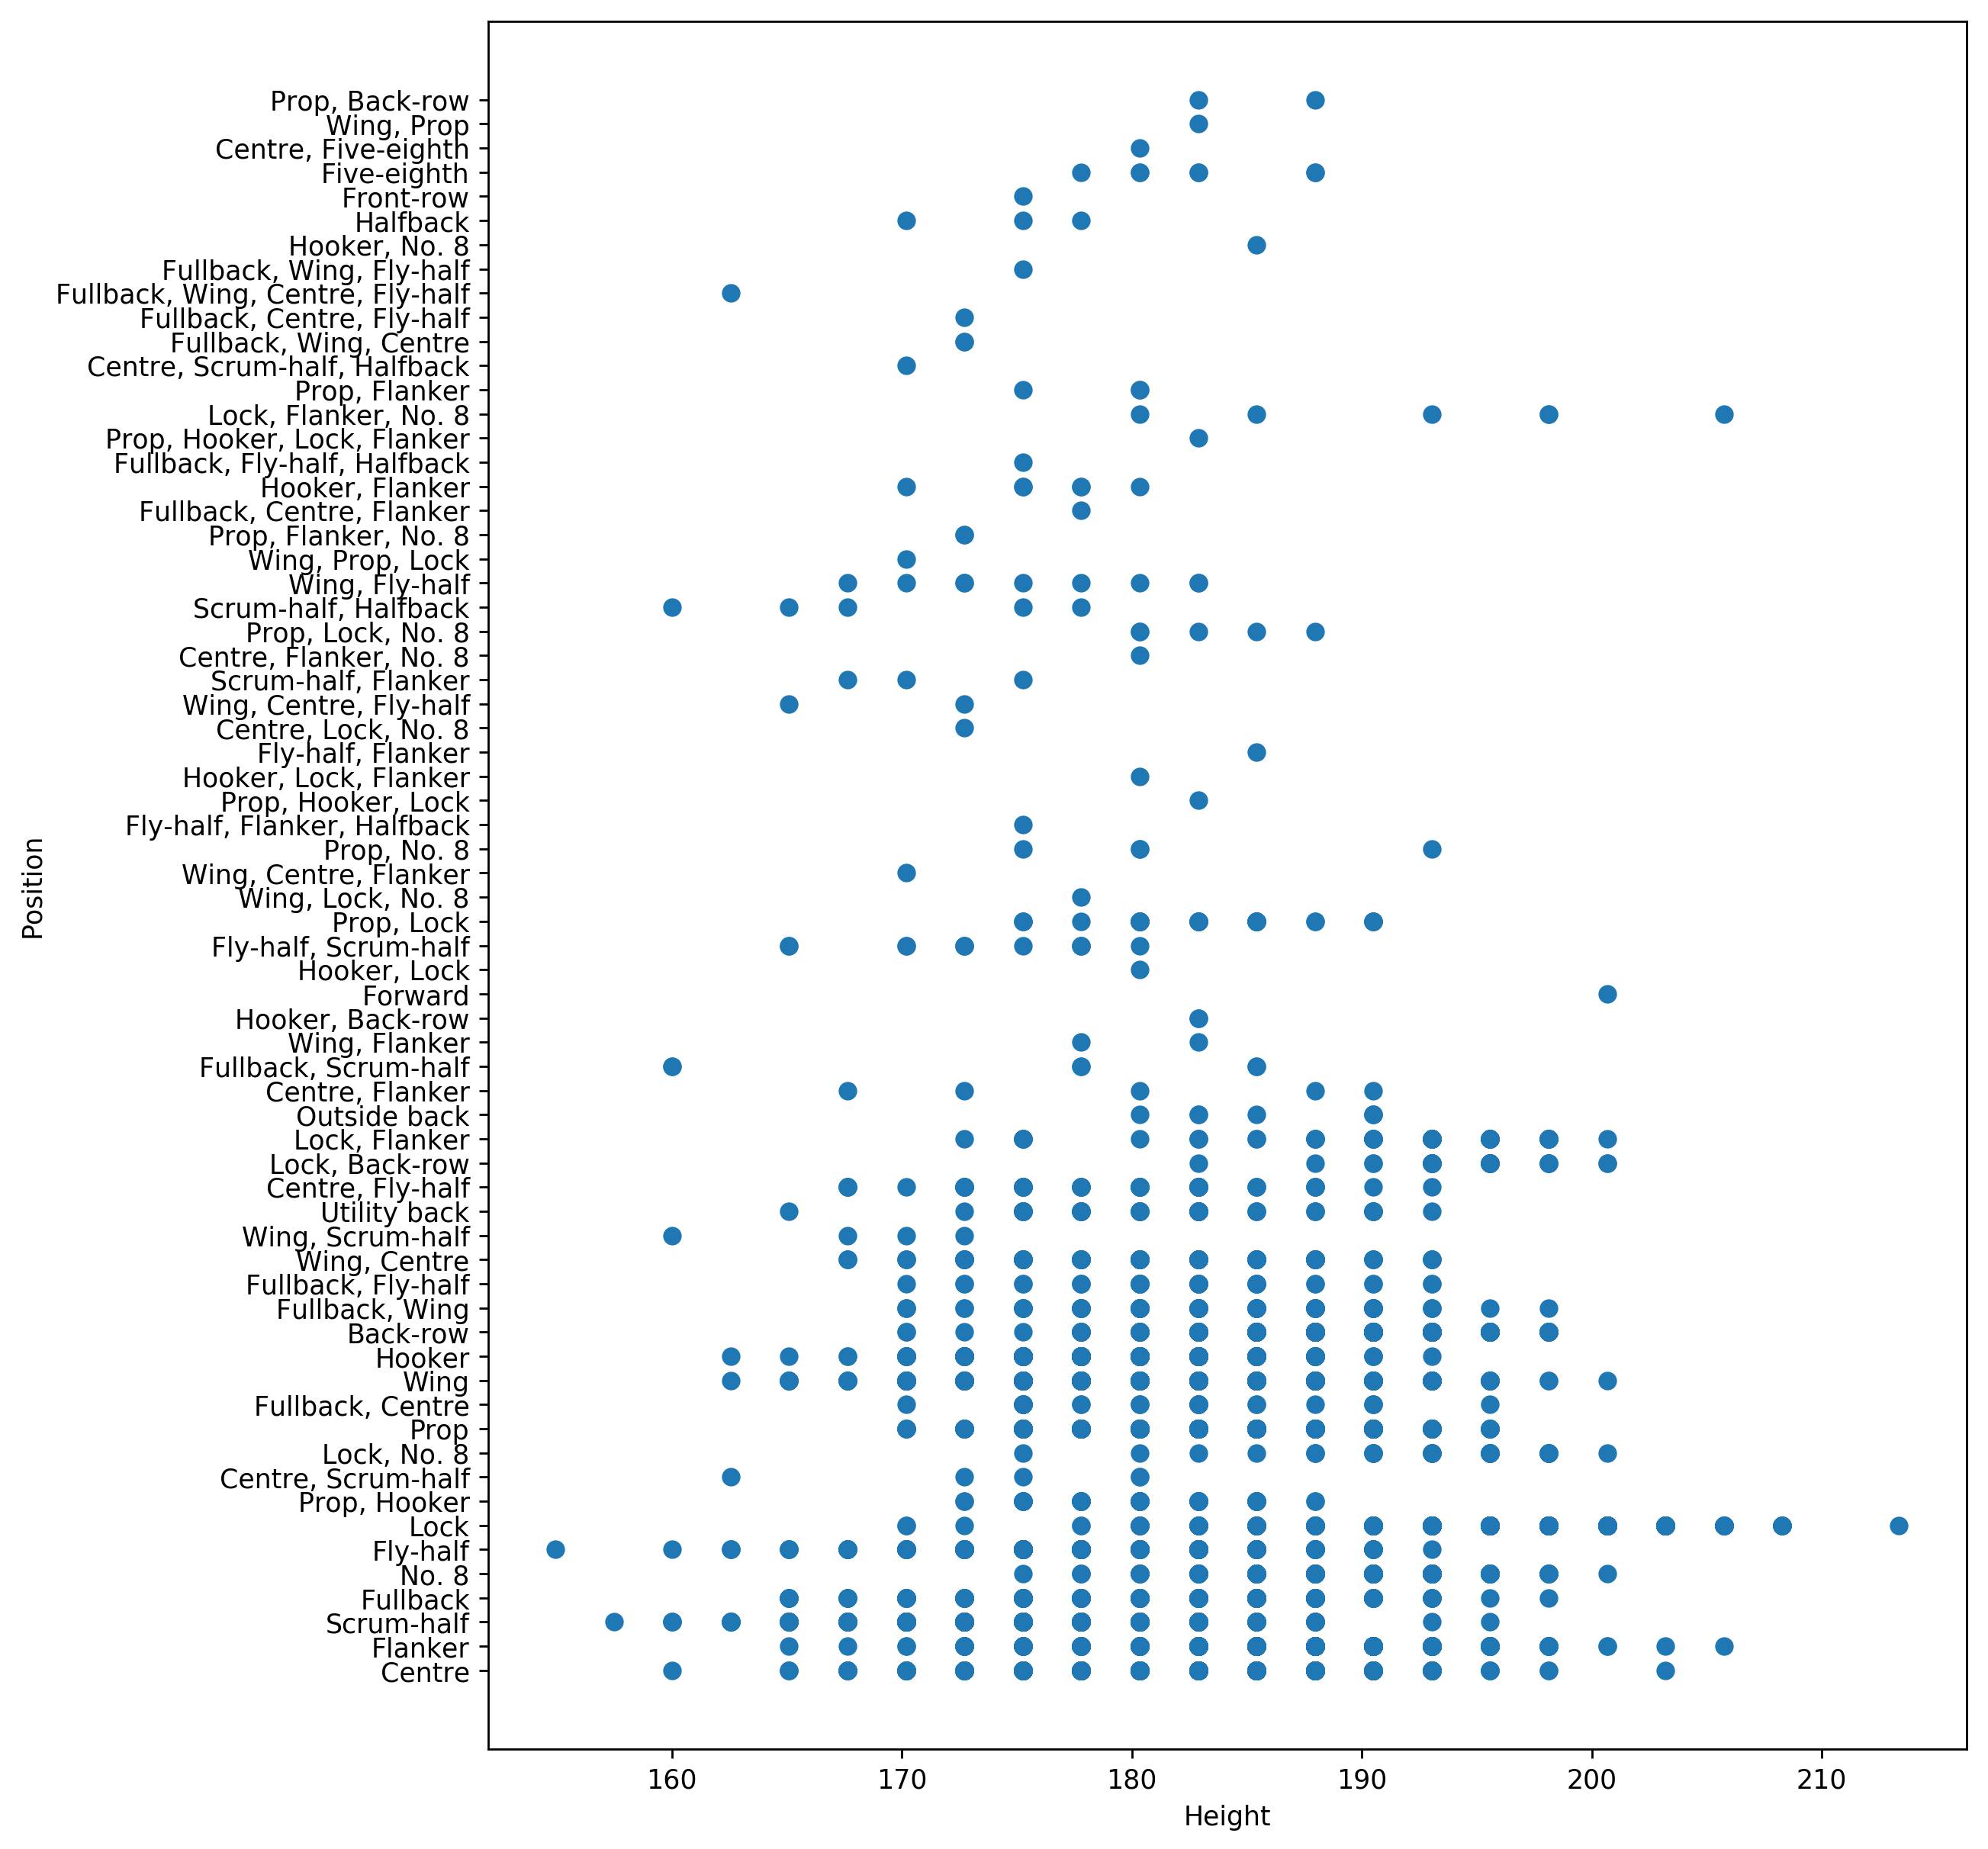

In [41]:
from pylab import rcParams

data = data.query('Weight > 0')
data = data.query('Height > 0')

x = data['Position']
y = data['Height']
fig = plt.figure(figsize=(10,12),dpi=250)
plt.ylabel('Position')
plt.xlabel('Height')

plt.scatter(y,x)

In [49]:
result = data[data['name'].str.contains('George Ford')]
result.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
3603,George Ford,"March 16, 1993, Oldham",5,Fly-half,49,39,10,220.0,6,38,36,2,73.46,177.8,85.728958,2014,1993
